# Linear Transformations - Lab

## Introduction

In this lab, you'll practice your linear transformation skills!

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## Ames Housing Data

Let's look at the Ames Housing data, where each record represents a home sale:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


We'll use this subset of features. These are specifically the _continuous numeric_ variables, which means that we'll hopefully have meaningful mean values.

From the data dictionary (`data_description.txt`):

```
LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet
```

In [2]:
ames = ames[[
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "SalePrice"
]].copy()
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


We'll also drop any records with missing values for any of these features:

In [3]:
ames.dropna(inplace=True)
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


And plot the distributions of the un-transformed variables:

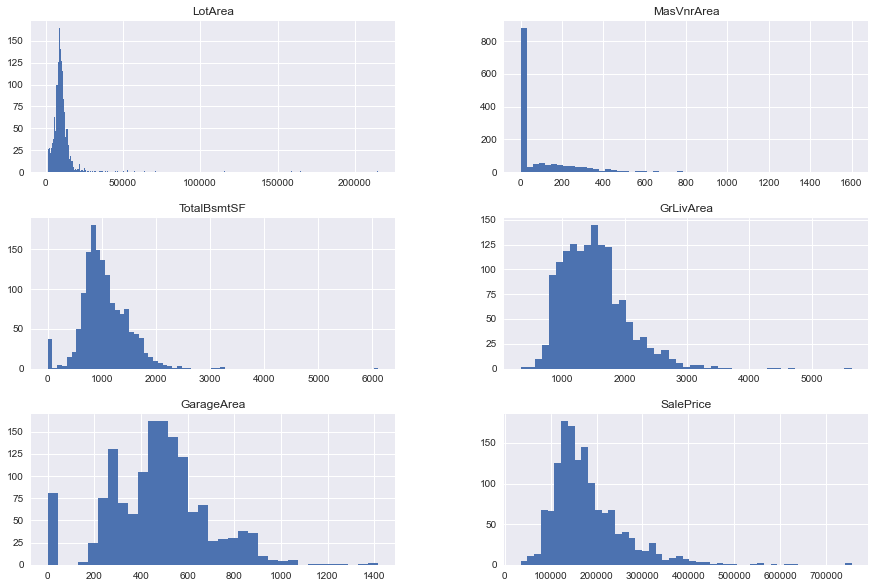

In [6]:
ames.hist(figsize=(15,10), bins="auto");

## Step 1: Build an Initial Linear Regression Model

`SalePrice` should be the target, and all other columns in `ames` should be predictors.

In [15]:
# Your code here - build a linear regression model with un-transformed features
import statsmodels.api as sm
X = ames.drop('SalePrice',axis=1)
y = ames['SalePrice']
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        06:56:58   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.525e+04   4145.934     -3.677      0.000   -2.34e+04   -7113.396
LotArea         0.2568      0.125      2.056      0.040       0.012       0.502
MasVnrArea     55.0481      7.427      7.412      0.000      40.480      69.616
TotalBsmtSF    44.1640      3.324     13.286      0.000      37.643      50.685
GrLivArea      63.8443      2.772     23.030      0.000      58.406      69.282
GarageArea     93.4629      6.795     13.755      0.000      80.134     106.792
==============================================================================
Omnibus:                      817.744   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77147.499
Skew:                          -1.709   Prob(JB):                         0.00
Kurtosis:                      38.546   Cond. No.                     5.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
col_names = ['r-squared','r-squared_adj','p_val','coef_const','coef_LotArea','coef_MasVnrArea','coef_TotalBsmtSF','coef_GrLivArea','coef_GarageArea','pval_const','pval_LotArea','pval_MasVnrArea','pval_TotalBsmtSF','pval_GrLivArea','pval_GarageArea' ]
def add_results(results,name):
    new_row = []
    new_row.append(results.rsquared)
    new_row.append(results.rsquared_adj)
    new_row.append(results.f_pvalue)
    for i in results.params:
        new_row.append(i)
    for j in results.pvalues:
        new_row.append(j)
    df = pd.DataFrame(new_row,columns=[name],index=col_names)
    return df
    




In [55]:
df = pd.DataFrame(index= col_names)

In [57]:
df = pd.concat([df,add_results(results,'first')],axis=1)
df

,first
r-squared,6.758415e-01
r-squared_adj,6.747206e-01
p_val,0.000000e+00
coef_const,-1.524608e+04
coef_LotArea,2.567694e-01
coef_MasVnrArea,5.504806e+01
coef_TotalBsmtSF,4.416403e+01
coef_GrLivArea,6.384432e+01
coef_GarageArea,9.346293e+01
pval_const,2.442925e-04


## Step 2: Evaluate Initial Model and Interpret Coefficients

Describe the model performance overall and interpret the meaning of each predictor coefficient. Make sure to refer to the explanations of what each feature means from the data dictionary!

**Interpretation**
* Model accounts for 67.5% of the variability (Adjusted $R^2$)
* All p-values significant. Although `LotArea` is close with 0.04.
* Our model predicts that a house with no square feet, with no Masonry veneer, and with no basement, garage, or square feet above ground level would be -//$15,250.
* `LotArea`: For each increase of 1 sqft in lot size, we see an associated increase of about \\$0.26 in sale price.
* `MasVnrArea`: For each increase of 1 sqft in masonry veneer area, we see an associated increase of about \\$55 in sale price.
* `TotalBsmtSF`: For each increase of 1 sqft in total basement area, we see an associated increase of about \\$44 in sale price.
* `GrLivArea`: For each increase of 1 sqft in above-grade living area, we see an associated increase of about \\$67 in sale price.
* `GarageArea`: For each increase of 1 sqft in garage area, we see an associated increase of about \\$93 in sale price.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

* `LotArea`: for each additional square foot of lot area, the price increases by about \\$0.26
* `MasVnrArea`: for each additional square foot of masonry veneer, the price increases by about \\$55
* `TotalBsmtSF`: for each additional square foot of basement area, the price increases by about \\$44
* `GrLivArea`: for each additional square foot of above-grade living area, the price increases by about \\$64
* `GarageArea`: for each additional square foot of garage area, the price increases by about \\$93

</details>

## Step 3: Express Model Coefficients in Metric Units

Your stakeholder gets back to you and says this is great, but they are interested in metric units.

Specifically they would like to measure area in square meters rather than square feet.

Report the same coefficients, except using square meters. You can do this by building a new model, or by transforming just the coefficients.

The conversion you can use is **1 square foot = 0.092903 square meters**.

In [18]:
# Your code here - building a new model or transforming coefficients
# from initial model so that they are in square meters
X_metric = X*0.092903
model2 = sm.OLS(y, sm.add_constant(X_metric))
results2 = model2.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        07:00:10   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.525e+04   4145.934     -3.677      0.000   -2.34e+04   -7113.396
LotArea         2.7638      1.344      2.056      0.040       0.127       5.400
MasVnrArea    592.5326     79.941      7.412      0.000     435.719     749.346
TotalBsmtSF   475.3778     35.780     13.286      0.000     405.191     545.565
GrLivArea     687.2148     29.840     23.030      0.000     628.680     745.750
GarageArea   1006.0270     73.139     13.755      0.000     862.557    1149.497
==============================================================================
Omnibus:                      817.744   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77147.499
Skew:                          -1.709   Prob(JB):                         0.00
Kurtosis:                      38.546   Cond. No.                     4.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
df = pd.concat([df,add_results(results2,'metric')],axis=1)
df

,first,metric
r-squared,6.758415e-01,6.758415e-01
r-squared_adj,6.747206e-01,6.747206e-01
p_val,0.000000e+00,0.000000e+00
coef_const,-1.524608e+04,-1.524608e+04
coef_LotArea,2.567694e-01,2.763844e+00
coef_MasVnrArea,5.504806e+01,5.925326e+02
coef_TotalBsmtSF,4.416403e+01,4.753778e+02
coef_GrLivArea,6.384432e+01,6.872148e+02
coef_GarageArea,9.346293e+01,1.006027e+03
pval_const,2.442925e-04,2.442925e-04


**Interpretation**
* $R^2$ and $R^2$-adjusted are the same
* p-values for model and all coefficients are the same.
* Constant coefficient is the same.
* `LotArea`: For each increase of 1 square meter in lot size, we see an associated increase of about \\$2.76 in sale price.
* `MasVnrArea`: For each increase of 1 square meter in masonry veneer area, we see an associated increase of about \\$592 in sale price.
* `TotalBsmtSF`: For each increase of 1 square meter in total basement area, we see an associated increase of about \\$475 in sale price.
* `GrLivArea`: For each increase of 1 square meter in above-grade living area, we see an associated increase of about \\$687 in sale price.
* `GarageArea`: For each increase of 1 square meter in garage area, we see an associated increase of about \\$1006 in sale price.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

* `LotArea`: for each additional square meter of lot area, the price increases by about \\$2.76
* `MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$593
* `TotalBsmtArea`: for each additional square meter of basement area, the price increases by about \\$475
* `GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687
* `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1,006

</details>

## Step 4: Center Data to Provide an Interpretable Intercept

Your stakeholder is happy with the metric results, but now they want to know what's happening with the intercept value. Negative \\$17k for a home with zeros across the board...what does that mean?

Center the data so that the mean is 0, fit a new model, and report on the new intercept.

(It doesn't matter whether you use data that was scaled to metric units or not. The intercept should be the same either way.)

In [72]:
# Your code here - center data
X2 = X - X.mean()
model3 = sm.OLS(y, sm.add_constant(X2))
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        10:46:14   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.806e+05   1186.695    152.200      0.000    1.78e+05    1.83e+05
LotArea         0.2568      0.125      2.056      0.040       0.012       0.502
MasVnrArea     55.0481      7.427      7.412      0.000      40.480      69.616
TotalBsmtSF    44.1640      3.324     13.286      0.000      37.643      50.685
GrLivArea      63.8443      2.772     23.030      0.000      58.406      69.282
GarageArea     93.4629      6.795     13.755      0.000      80.134     106.792
==============================================================================
Omnibus:                      817.744   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77147.499
Skew:                          -1.709   Prob(JB):                         0.00
Kurtosis:                      38.546   Cond. No.                     9.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
df = pd.concat([df,add_results(results3,'centered')],axis=1)
df

,first,metric,centered
r-squared,6.758415e-01,6.758415e-01,6.758415e-01
r-squared_adj,6.747206e-01,6.747206e-01,6.747206e-01
p_val,0.000000e+00,0.000000e+00,0.000000e+00
coef_const,-1.524608e+04,-1.524608e+04,1.806151e+05
coef_LotArea,2.567694e-01,2.763844e+00,2.567694e-01
coef_MasVnrArea,5.504806e+01,5.925326e+02,5.504806e+01
coef_TotalBsmtSF,4.416403e+01,4.753778e+02,4.416403e+01
coef_GrLivArea,6.384432e+01,6.872148e+02,6.384432e+01
coef_GarageArea,9.346293e+01,1.006027e+03,9.346293e+01
pval_const,2.442925e-04,2.442925e-04,0.000000e+00


**Interpretation**
All of the values are the same except the constant. Which means that a house with all of the average level of `LotArea`, `MasVnrArea`, `TotalBsmtSF`, and `GarageArea` would be about \\$180,615

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The new intercept is about \\$181k. This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about \\$181k.

</details>

## Step 5: Identify the "Most Important" Feature

Finally, either build a new model with transformed coefficients or transform the coefficients from the Step 4 model so that the most important feature can be identified.

Even though all of the features are measured in area, they are different kinds of area (e.g. lot area vs. masonry veneer area) that are not directly comparable as-is. So apply **standardization** (dividing predictors by their standard deviations) and identify the feature with the highest standardized coefficient as the "most important".

In [75]:
# Your code here - building a new model or transforming coefficients
# from centered model so that they are in standard deviations
X_stand = (X - X.mean())/X.std()
model4 = sm.OLS(y, sm.add_constant(X_stand))
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        10:51:02   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.806e+05   1186.695    152.200      0.000    1.78e+05    1.83e+05
LotArea      2565.0144   1247.413      2.056      0.040     118.081    5011.948
MasVnrArea   9967.3432   1344.739      7.412      0.000    7329.495    1.26e+04
TotalBsmtSF  1.935e+04   1456.358     13.286      0.000    1.65e+04    2.22e+04
GrLivArea    3.356e+04   1457.171     23.030      0.000    3.07e+04    3.64e+04
GarageArea   2.001e+04   1454.817     13.755      0.000    1.72e+04    2.29e+04
==============================================================================
Omnibus:                      817.744   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77147.499
Skew:                          -1.709   Prob(JB):                         0.00
Kurtosis:                      38.546   Cond. No.                         2.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
df = pd.concat([df,add_results(results4,'standardized')],axis=1)
df

,first,metric,centered,standardized
r-squared,6.758415e-01,6.758415e-01,6.758415e-01,6.758415e-01
r-squared_adj,6.747206e-01,6.747206e-01,6.747206e-01,6.747206e-01
p_val,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
coef_const,-1.524608e+04,-1.524608e+04,1.806151e+05,1.806151e+05
coef_LotArea,2.567694e-01,2.763844e+00,2.567694e-01,2.565014e+03
coef_MasVnrArea,5.504806e+01,5.925326e+02,5.504806e+01,9.967343e+03
coef_TotalBsmtSF,4.416403e+01,4.753778e+02,4.416403e+01,1.934910e+04
coef_GrLivArea,6.384432e+01,6.872148e+02,6.384432e+01,3.355835e+04
coef_GarageArea,9.346293e+01,1.006027e+03,9.346293e+01,2.001101e+04
pval_const,2.442925e-04,2.442925e-04,0.000000e+00,0.000000e+00


**Interpretation**
`GrLivArea` is the most important feature as an increase in one standard deviation is related to an increase in \\$33,558.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

</details>

## Summary
Great! You've now got some hands-on practice transforming data and interpreting the results!